In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
df['Extracurricular Activities']=df['Extracurricular Activities'].replace({"No":0, "Yes":1})

In [12]:
df['Extracurricular Activities'].value_counts()

0    5052
1    4948
Name: Extracurricular Activities, dtype: int64

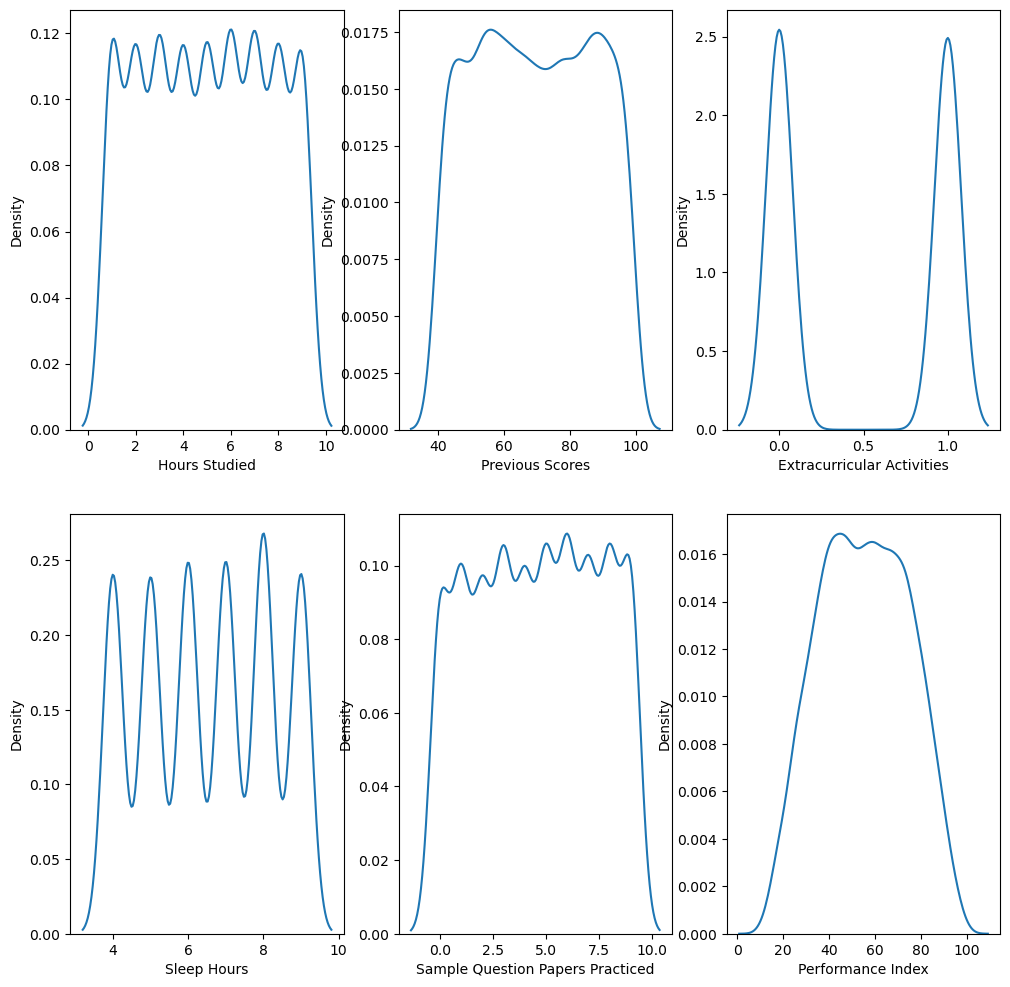

In [13]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Initialize a subplot counter
i = 1

# Iterate over the columns in your DataFrame
for col in df.columns:
    # Create a subplot
    plt.subplot(2, 3, i)
    
    # Use seaborn's kdeplot to visualize the distribution
    sns.kdeplot(df[col])
    
    # Increment the subplot counter
    i += 1

# Show the subplots
plt.show()


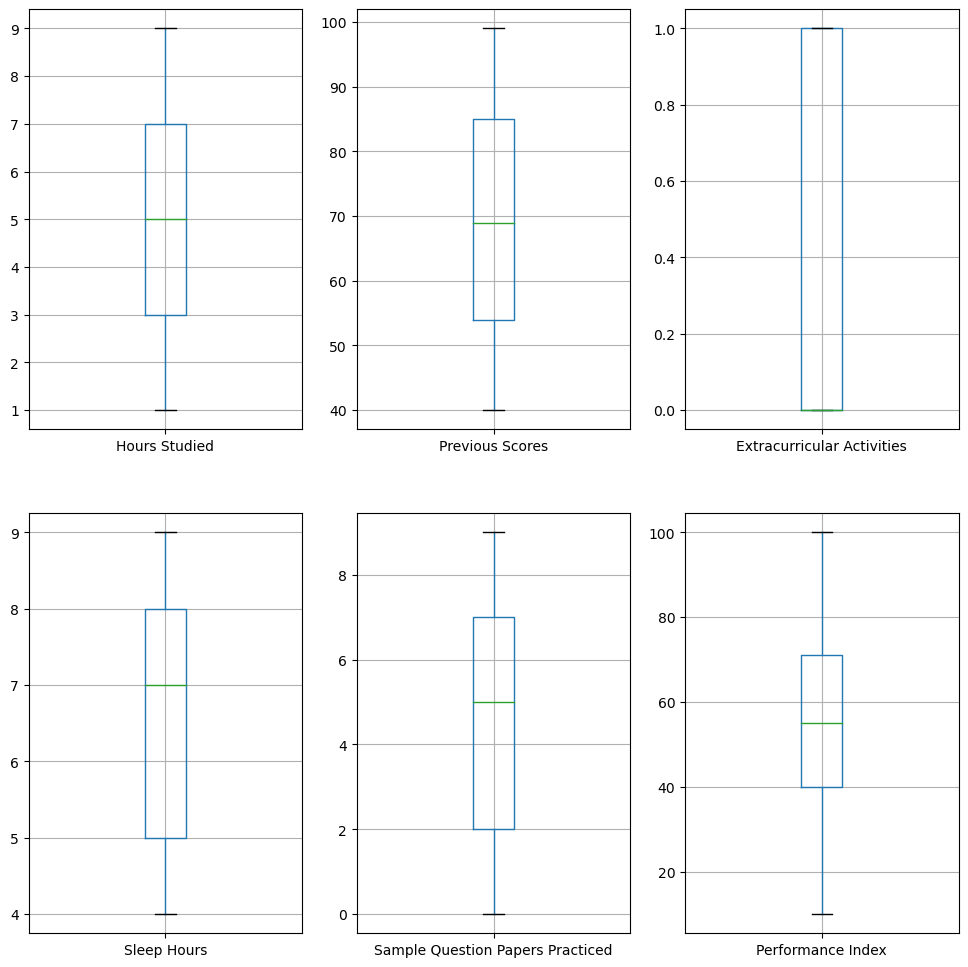

In [14]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Initialize a subplot counter
i = 1

# Iterate over the columns in your DataFrame (assuming it's called 'df')
for col in df.columns:
    # Create a subplot
    plt.subplot(2, 3, i)
    
    # Use boxplot to visualize the distribution of a single column
    df[[col]].boxplot()
    
    # Increment the subplot counter
    i += 1

# Show the subplots
plt.show()


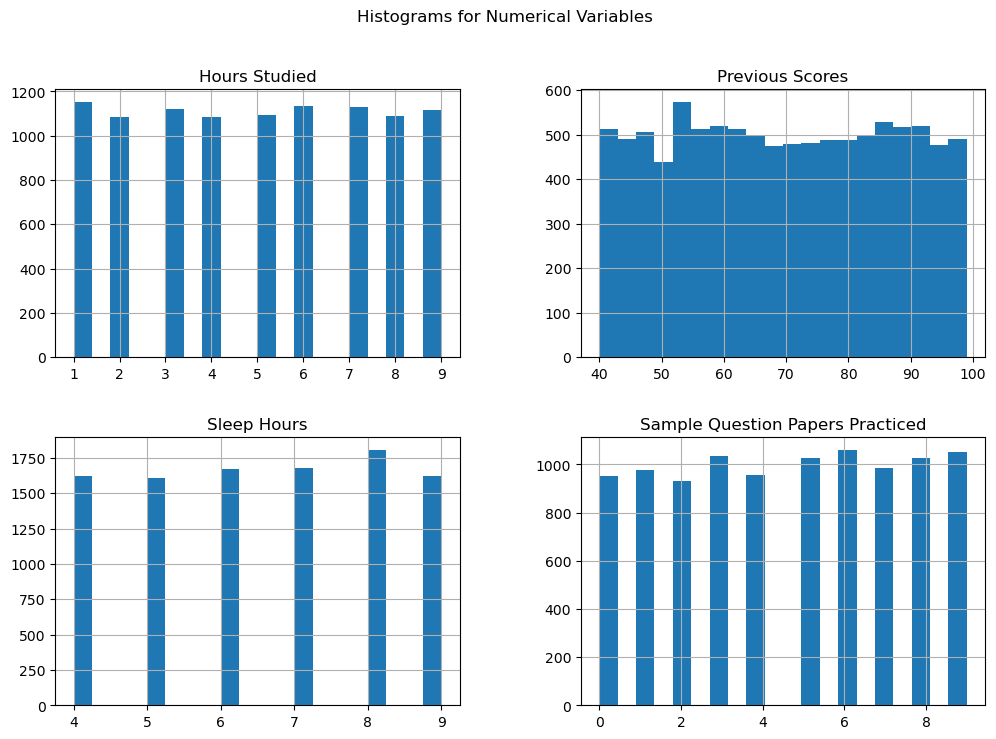

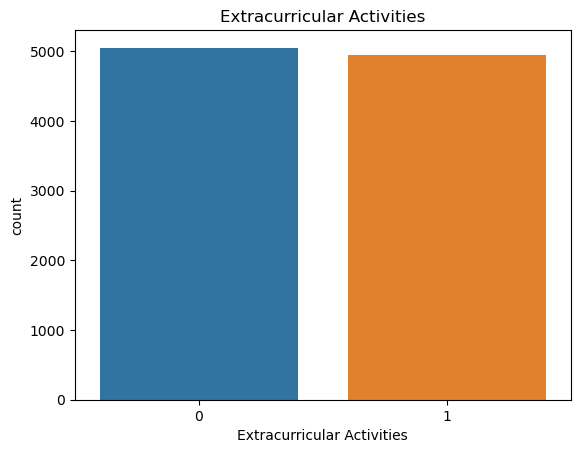

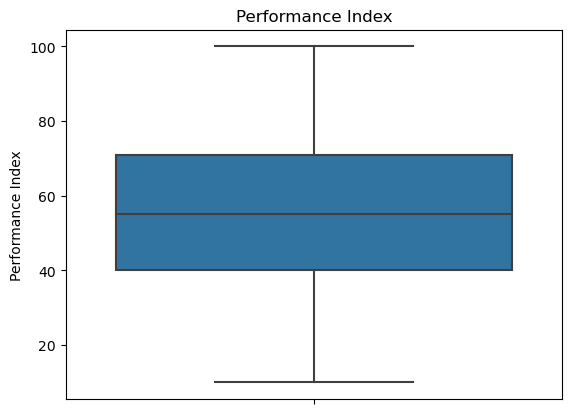

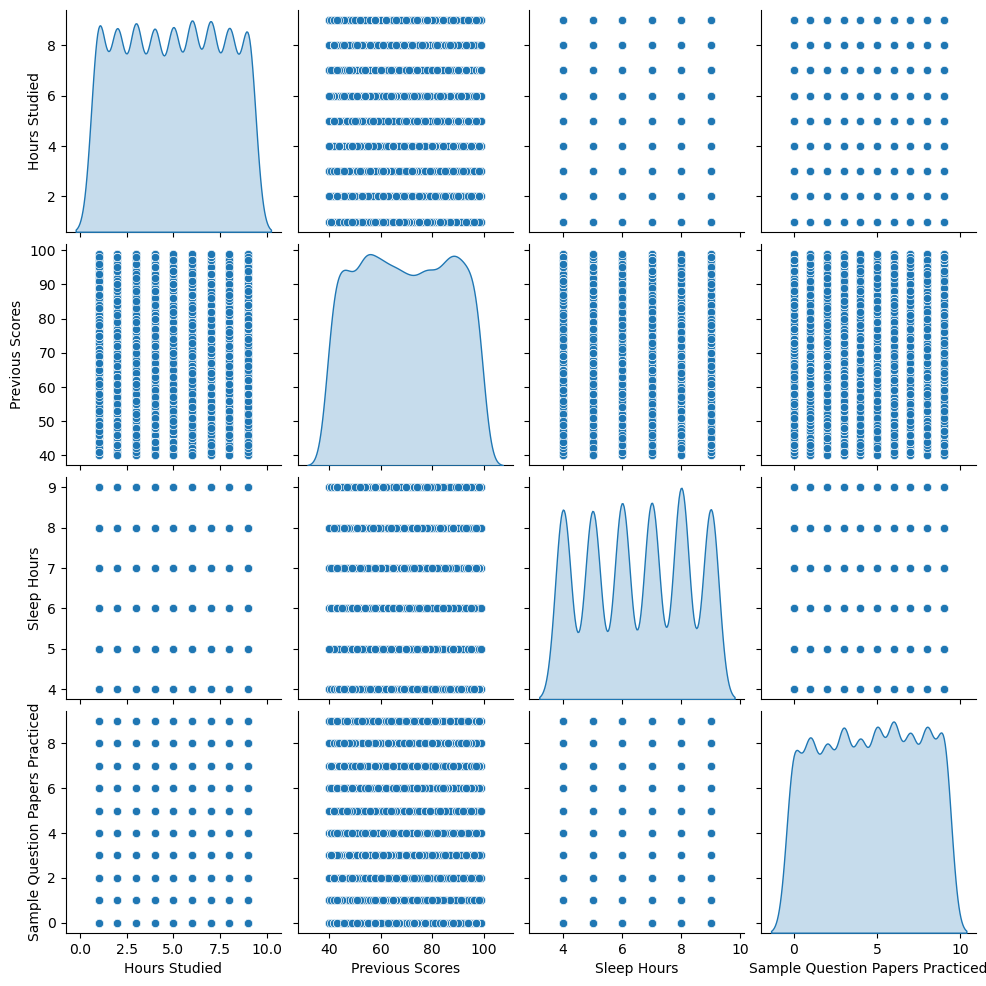

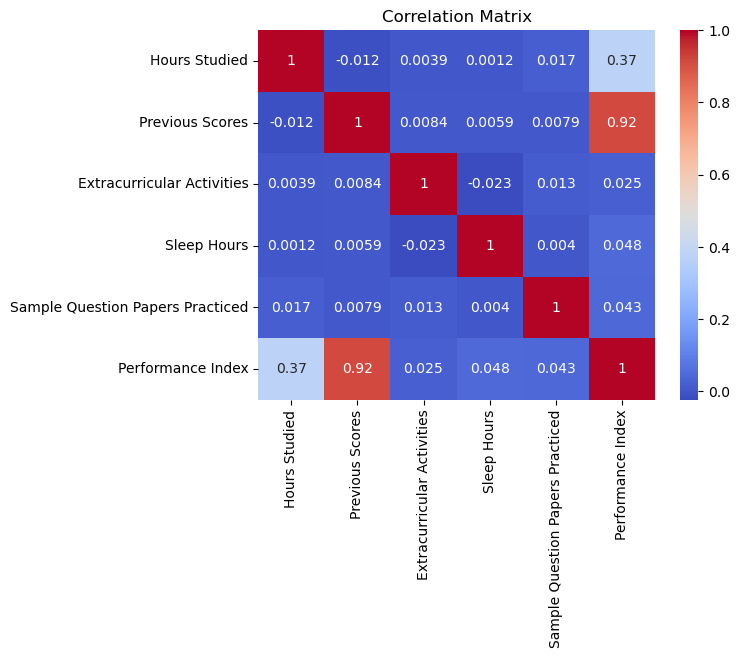

In [16]:
# Data visualization

# Histograms for numerical variables
df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

# Countplot for Extracurricular Activities
sns.countplot(data=df, x='Extracurricular Activities')
plt.title('Extracurricular Activities')
plt.show()

# Boxplot for Performance Index
sns.boxplot(data=df, y='Performance Index')
plt.title('Performance Index')
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data=df, vars=['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'], diag_kind='kde')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
x = df.drop('Performance Index',axis=1)
y = df['Performance Index']

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.20)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


In [20]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [21]:
y_pred_test = model.predict(x_test)

In [22]:
print("-----Model Evaluation on Test Data-----")
print("MAE:",mean_absolute_error(y_test, y_pred_test))
print("MSE:",mean_squared_error(y_test, y_pred_test))
print("R2_score:",r2_score(y_test, y_pred_test))

-----Model Evaluation on Test Data-----
MAE: 1.586450029589237
MSE: 4.001395492813592
R2_score: 0.9893218576304814


In [23]:
y_pred_train = model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print("MAE:",mean_absolute_error(y_train, y_pred_train))
print("MSE:",mean_squared_error(y_train, y_pred_train))
print("R2_score:",r2_score(y_train, y_pred_train))

-----Model Evaluation on Train Data-----
MAE: 1.6254713808954926
MSE: 4.1891584665987445
R2_score: 0.9886063411556624


In [24]:
x_input = [10,85,1,7,3]
predictions = model.predict([x_input])[0]
print("Performance Index for given Data:",predictions)

Performance Index for given Data: 85.60440860001938
